# Entry 44 notebook - Decision Trees

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz
import openml

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

## Iris Dataset

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


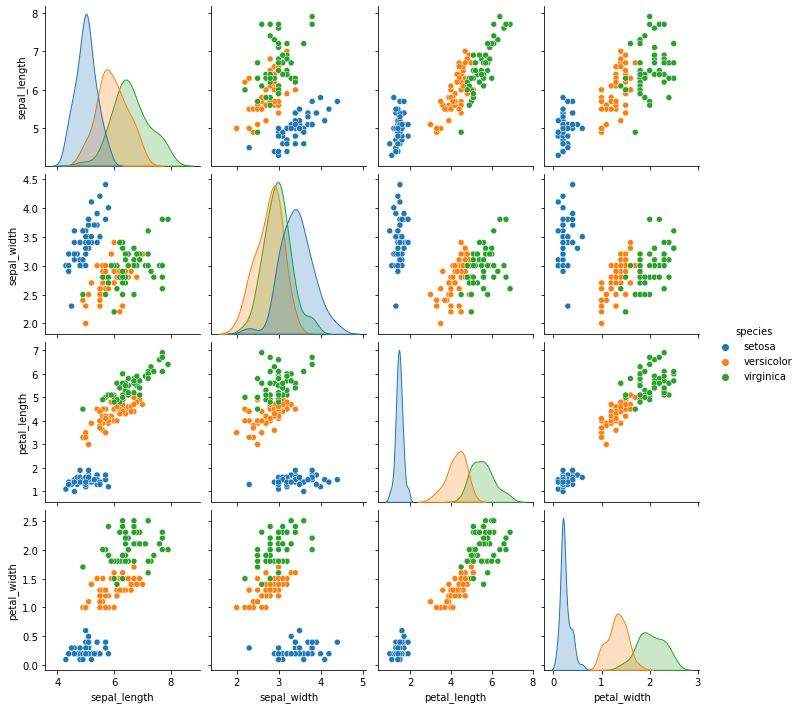

In [3]:
feature_plot = sns.pairplot(iris, hue='species')
feature_plot.savefig('images/feature_plot')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris['species'],
                                                    train_size=.8, stratify=iris['species'], random_state=12)

### Unlimited Tree

In [5]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

print("Accuracy: {:.2f}".format(tree_clf.score(X_train,y_train)))
print("Accuracy: {:.2f}".format(tree_clf.score(X_test,y_test)))

Accuracy: 1.00
Accuracy: 1.00


In [6]:
pd.DataFrame(tree_clf.feature_importances_, index=X_train.columns)

,0
sepal_length,0.016667
sepal_width,0.016667
petal_length,0.060759
petal_width,0.905908


In [100]:
tree_clf.tree_.compute_feature_importances()

array([0.        , 0.        , 0.        , 0.00704334, 0.        ,
       0.        , 0.01202192, 0.        , 0.        , 0.        ,
       0.00181434, 0.        , 0.0075129 , 0.04476728, 0.00804954,
       0.        , 0.01780112, 0.        , 0.00626075, 0.01807588,
       0.        , 0.02683179, 0.        , 0.10461367, 0.        ,
       0.        , 0.01643447, 0.728773  , 0.        , 0.        ])

In [30]:
tree_clf.predict_proba(X_test)

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

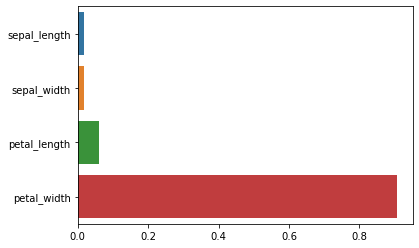

In [7]:
sns.barplot(x=tree_clf.feature_importances_, y=X_train.columns)

In [8]:
y_train.unique().tolist()

['virginica', 'setosa', 'versicolor']

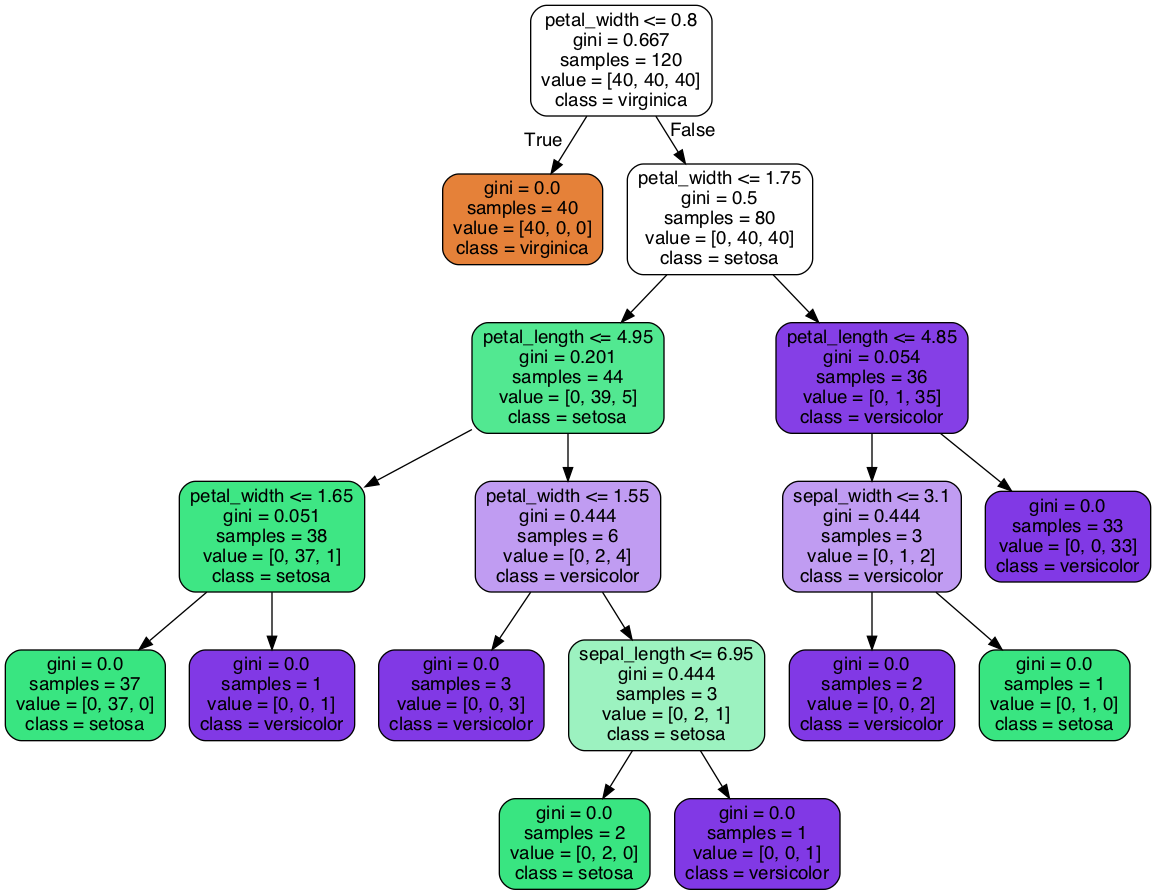

In [19]:
# import pydotplus
# from sklearn import tree
# from IPython.display import Image

# dot_data = tree.export_graphviz(tree_clf, out_file=None,
#                feature_names=X_train.columns.tolist(),
#                class_names = y_train.unique().tolist(),
#                rounded=True,
#                filled=True)

# graph = pydotplus.graph_from_dot_data(dot_data)
# Image(graph.create_png())

# graph.write_png('images/iris_tree.png')

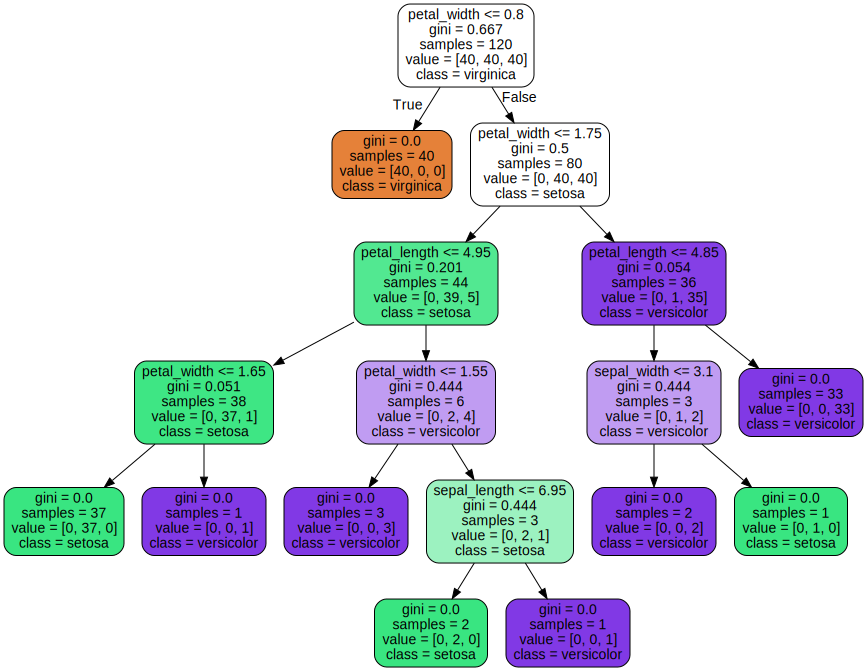

In [26]:
# dot_data = tree.export_graphviz(tree_clf, out_file=None,
#                feature_names=X_train.columns.tolist(),
#                class_names = y_train.unique().tolist(),
#                rounded=True,
#                filled=True)
# graphviz.Source(dot_data)

In [29]:
# from sklearn.tree import export_text

# text = export_text(tree_clf, feature_names=X_train.columns.tolist())
# print(text)

|--- petal_width <= 0.80
|   |--- class: setosa
|--- petal_width >  0.80
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 4.95
|   |   |   |--- petal_width <= 1.65
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal_width >  1.65
|   |   |   |   |--- class: virginica
|   |   |--- petal_length >  4.95
|   |   |   |--- petal_width <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- petal_width >  1.55
|   |   |   |   |--- sepal_length <= 6.95
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- sepal_length >  6.95
|   |   |   |   |   |--- class: virginica
|   |--- petal_width >  1.75
|   |   |--- petal_length <= 4.85
|   |   |   |--- sepal_width <= 3.10
|   |   |   |   |--- class: virginica
|   |   |   |--- sepal_width >  3.10
|   |   |   |   |--- class: versicolor
|   |   |--- petal_length >  4.85
|   |   |   |--- class: virginica



[Text(167.4, 199.32, 'petal_width <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = virginica'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = virginica'),
 Text(193.15384615384616, 163.07999999999998, 'petal_width <= 1.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = setosa'),
 Text(103.01538461538462, 126.83999999999999, 'petal_length <= 4.95\ngini = 0.201\nsamples = 44\nvalue = [0, 39, 5]\nclass = setosa'),
 Text(51.50769230769231, 90.6, 'petal_width <= 1.65\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]\nclass = setosa'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = setosa'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = versicolor'),
 Text(154.52307692307693, 90.6, 'petal_width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = versicolor'),
 Text(128.76923076923077, 54.35999999999

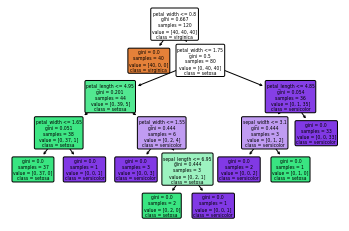

In [25]:
# tree.plot_tree(tree_clf,
#                feature_names=X_train.columns.tolist(),
#                class_names = y_train.unique().tolist(),
#                rounded=True,
#                filled=True)

In [18]:
export_graphviz(tree_clf, out_file=None,
                feature_names=X_train.columns.tolist(),
                class_names = y_train.unique().tolist(),
                rounded=True,
                filled=True)

DecisionTreeClassifier()

In [8]:
!dot -Tpng images/iris_tree.dot -o images/iris_tree.png

<img src='images/iris_tree.png' width=750>

### Max Depth 4

In [5]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train,y_train)

print("Accuracy: {:.2f}".format(tree_clf.score(X_train,y_train)))
print("Accuracy: {:.2f}".format(tree_clf.score(X_test,y_test)))

Accuracy: 0.99
Accuracy: 1.00


In [6]:
y_train.unique().tolist()

['virginica', 'setosa', 'versicolor']

In [7]:
export_graphviz(tree_clf, out_file=('images/iris_tree_d4.dot'),
               feature_names=X_train.columns.tolist(),
               class_names = y_train.unique().tolist(),
               rounded=True,
               filled=True)

In [8]:
!dot -Tpng images/iris_tree_d4.dot -o images/iris_tree_d4.png

<img src='images/iris_tree_d4.png' width=750>

### Five Minimum Samples per Split

In [13]:
tree_clf = DecisionTreeClassifier(min_samples_split = 5)
tree_clf.fit(X_train,y_train)

print("Accuracy: {:.2f}".format(tree_clf.score(X_train,y_train)))
print("Accuracy: {:.2f}".format(tree_clf.score(X_test,y_test)))

Accuracy: 0.98
Accuracy: 1.00


In [14]:
y_train.unique().tolist()

['virginica', 'setosa', 'versicolor']

In [15]:
export_graphviz(tree_clf, out_file=('images/iris_tree_split5.dot'),
               feature_names=X_train.columns.tolist(),
               class_names = y_train.unique().tolist(),
               rounded=True,
               filled=True)

In [16]:
!dot -Tpng images/iris_tree_split5.dot -o images/iris_tree_split5.png

<img src='images/iris_tree_split5.png' width=750>

### Five Minimum Samples per Leaf

In [31]:
tree_clf = DecisionTreeClassifier(min_samples_leaf = 5)
tree_clf.fit(X_train,y_train)

print("Accuracy: {:.2f}".format(tree_clf.score(X_train,y_train)))
print("Accuracy: {:.2f}".format(tree_clf.score(X_test,y_test)))

Accuracy: 0.97
Accuracy: 1.00


In [33]:
tree_clf.predict_proba(X_test)

array([[0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ]])

In [32]:
y_train.unique().tolist()

['virginica', 'setosa', 'versicolor']

In [20]:
export_graphviz(tree_clf, out_file=('images/iris_tree_leaf5.dot'),
               feature_names=X_train.columns.tolist(),
               class_names = y_train.unique().tolist(),
               rounded=True,
               filled=True)

In [21]:
!dot -Tpng images/iris_tree_leaf5.dot -o images/iris_tree_leaf5.png

<img src='images/iris_tree_leaf5.png' width=750>

### Maximum Number of Leaves at Five

In [22]:
tree_clf = DecisionTreeClassifier(max_leaf_nodes = 5)
tree_clf.fit(X_train,y_train)

print("Accuracy: {:.2f}".format(tree_clf.score(X_train,y_train)))
print("Accuracy: {:.2f}".format(tree_clf.score(X_test,y_test)))

Accuracy: 0.97
Accuracy: 1.00


In [23]:
y_train.unique().tolist()

['virginica', 'setosa', 'versicolor']

In [27]:
export_graphviz(tree_clf, out_file=('images/iris_tree_5leaves.dot'),
               feature_names=X_train.columns.tolist(),
               class_names = y_train.unique().tolist(),
               rounded=True,
               filled=True)

In [28]:
!dot -Tpng images/iris_tree_5leaves.dot -o images/iris_tree_5leaves.png

<img src='images/iris_tree_5leaves.png' width=750>

## Breast Cancer dataset

In [30]:
from sklearn.datasets import load_breast_cancer

In [31]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    train_size=.8, stratify=cancer.target, random_state=12)

### Unlimited Tree

In [40]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

print("Accuracy: {:.2f}".format(tree_clf.score(X_train,y_train)))
print("Accuracy: {:.2f}".format(tree_clf.score(X_test,y_test)))

Accuracy: 1.00
Accuracy: 0.89


In [41]:
export_graphviz(tree_clf, out_file=('images/cancer_tree.dot'),
               feature_names=cancer.feature_names,
               class_names = cancer.target_names,
               rounded=True,
               filled=True)

In [42]:
!dot -Tpng images/cancer_tree.dot -o images/cancer_tree.png

<img src='images/cancer_tree.png'>

### Max Depth 4

In [35]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train,y_train)

print("Accuracy: {:.2f}".format(tree_clf.score(X_train,y_train)))
print("Accuracy: {:.2f}".format(tree_clf.score(X_test,y_test)))

Accuracy: 0.99
Accuracy: 0.87


In [36]:
export_graphviz(tree_clf, out_file=('images/cancer_tree_d4.dot'),
               feature_names=cancer.feature_names,
               class_names = cancer.target_names,
               rounded=True,
               filled=True)

In [37]:
!dot -Tpng images/cancer_tree_d4.dot -o images/cancer_tree_d4.png

<img src='images/cancer_tree_d4.png'>

## Titanic Dataset

In [45]:
import category_encoders as ce

In [46]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [47]:
drop_cols = ['age', 'who', 'deck', 'embark_town', 'alive', 'class', 'embarked', 'deck']
titanic.drop(drop_cols, axis=1, inplace=True)
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,adult_male,alone
0,0,3,male,1,0,7.2500,True,False
1,1,1,female,1,0,71.2833,False,False
2,1,3,female,0,0,7.9250,False,True
3,1,1,female,1,0,53.1000,False,False
4,0,3,male,0,0,8.0500,True,True


In [48]:
binary_cols = ['sex', 'adult_male', 'alone']
index=titanic.index.tolist()
encoder = ce.OrdinalEncoder(cols=binary_cols)
oe_binary = pd.DataFrame(encoder.fit_transform(titanic[binary_cols]), index=index)
oe_binary.head()

//anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,sex,adult_male,alone
0,1,1,1
1,2,2,1
2,2,2,2
3,2,2,1
4,1,1,2


In [49]:
titanic_prep = pd.concat([titanic.drop(binary_cols, axis=1), oe_binary], axis=1)

np.where(pd.isnull(titanic_prep))

(array([], dtype=int64), array([], dtype=int64))

In [102]:
# titanic_prep[pd.isna(titanic_prep['age'])]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(titanic_prep.drop('survived', axis=1), titanic_prep['survived'],
                                                    train_size=.8, stratify=titanic_prep['survived'], random_state=12)

### Unlimited Tree

In [51]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

print("Accuracy: {:.2f}".format(tree_clf.score(X_train,y_train)))
print("Accuracy: {:.2f}".format(tree_clf.score(X_test,y_test)))

Accuracy: 0.93
Accuracy: 0.78


In [52]:
export_graphviz(tree_clf, out_file=('images/titanic_tree.dot'),
               feature_names=X_train.columns.tolist(),
               class_names = ['died', 'survived'],
               rounded=True,
               filled=True)

In [53]:
!dot -Tpng images/titanic_tree.dot -o images/titanic_tree.png

<img src='images/titanic_tree.png'>

### Max Depth 4

In [54]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train,y_train)

print("Accuracy: {:.2f}".format(tree_clf.score(X_train,y_train)))
print("Accuracy: {:.2f}".format(tree_clf.score(X_test,y_test)))

Accuracy: 0.84
Accuracy: 0.82


In [55]:
export_graphviz(tree_clf, out_file=('images/titanic_tree_d4.dot'),
               feature_names=X_train.columns.tolist(),
               class_names = ['died', 'survived'],
               rounded=True,
               filled=True)

In [56]:
!dot -Tpng images/titanic_tree_d4.dot -o images/titanic_tree_d4.png

<img src='images/titanic_tree_d4.png'>